## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.331854 -0.048372 -0.283390  0.447450 -0.825664 -0.147366
1 -0.345105 -0.162854 -1.760921 -1.858473 -1.335859 -0.709934
2 -0.436469  1.643701 -0.622060  0.748069  0.235747  1.128203
3  0.266457  0.324883 -1.336569  0.856116  0.712441  1.626711
4 -0.947338 -1.135017 -0.509580 -0.814920  0.396786 -1.403424


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9922491	total: 46.9ms	remaining: 46.9s
1:	learn: 0.9820246	total: 47.4ms	remaining: 23.6s
2:	learn: 0.9720305	total: 47.7ms	remaining: 15.8s
3:	learn: 0.9616497	total: 48ms	remaining: 12s
4:	learn: 0.9522886	total: 48.6ms	remaining: 9.67s
5:	learn: 0.9429455	total: 48.9ms	remaining: 8.1s
6:	learn: 0.9327216	total: 49.3ms	remaining: 6.99s
7:	learn: 0.9238838	total: 49.7ms	remaining: 6.16s
8:	learn: 0.9151668	total: 50ms	remaining: 5.51s
9:	learn: 0.9060183	total: 50.4ms	remaining: 4.99s
10:	learn: 0.8981465	total: 50.7ms	remaining: 4.56s
11:	learn: 0.8892528	total: 51.1ms	remaining: 4.21s
12:	learn: 0.8783007	total: 51.4ms	remaining: 3.9s
13:	learn: 0.8684183	total: 51.8ms	remaining: 3.64s
14:	learn: 0.8614974	total: 52.1ms	remaining: 3.42s
15:	learn: 0.8526931	total: 52.4ms	remaining: 3.22s
16:	learn: 0.8445863	total: 52.8ms	remaining: 3.05s
17:	learn: 0.8368091	total: 53.1ms	remaining: 2.9s
18:	learn: 0.8283816	total: 53.5ms	remaining: 2.76s
1

203:	learn: 0.1805603	total: 122ms	remaining: 475ms
204:	learn: 0.1793462	total: 122ms	remaining: 473ms
205:	learn: 0.1777381	total: 123ms	remaining: 472ms
206:	learn: 0.1762416	total: 123ms	remaining: 471ms
207:	learn: 0.1745103	total: 123ms	remaining: 470ms
208:	learn: 0.1730838	total: 124ms	remaining: 468ms
209:	learn: 0.1716530	total: 124ms	remaining: 467ms
210:	learn: 0.1705608	total: 125ms	remaining: 466ms
211:	learn: 0.1693154	total: 125ms	remaining: 465ms
212:	learn: 0.1683104	total: 125ms	remaining: 463ms
213:	learn: 0.1671117	total: 126ms	remaining: 462ms
214:	learn: 0.1655358	total: 126ms	remaining: 461ms
215:	learn: 0.1641577	total: 127ms	remaining: 459ms
216:	learn: 0.1630900	total: 127ms	remaining: 458ms
217:	learn: 0.1618479	total: 127ms	remaining: 457ms
218:	learn: 0.1604028	total: 128ms	remaining: 456ms
219:	learn: 0.1592396	total: 128ms	remaining: 455ms
220:	learn: 0.1582823	total: 129ms	remaining: 454ms
221:	learn: 0.1571786	total: 129ms	remaining: 453ms
222:	learn: 

480:	learn: 0.0307192	total: 224ms	remaining: 242ms
481:	learn: 0.0305453	total: 225ms	remaining: 242ms
482:	learn: 0.0303650	total: 225ms	remaining: 241ms
483:	learn: 0.0301758	total: 226ms	remaining: 241ms
484:	learn: 0.0299928	total: 226ms	remaining: 240ms
485:	learn: 0.0297932	total: 226ms	remaining: 239ms
486:	learn: 0.0295975	total: 227ms	remaining: 239ms
487:	learn: 0.0294578	total: 227ms	remaining: 238ms
488:	learn: 0.0292883	total: 227ms	remaining: 238ms
489:	learn: 0.0290994	total: 228ms	remaining: 237ms
490:	learn: 0.0288964	total: 228ms	remaining: 237ms
491:	learn: 0.0287360	total: 229ms	remaining: 236ms
492:	learn: 0.0285380	total: 229ms	remaining: 235ms
493:	learn: 0.0283440	total: 229ms	remaining: 235ms
494:	learn: 0.0282137	total: 230ms	remaining: 234ms
495:	learn: 0.0280399	total: 230ms	remaining: 234ms
496:	learn: 0.0278517	total: 230ms	remaining: 233ms
497:	learn: 0.0277063	total: 231ms	remaining: 232ms
498:	learn: 0.0275398	total: 231ms	remaining: 232ms
499:	learn: 

769:	learn: 0.0100567	total: 328ms	remaining: 97.8ms
770:	learn: 0.0100500	total: 328ms	remaining: 97.4ms
771:	learn: 0.0100078	total: 328ms	remaining: 97ms
772:	learn: 0.0099747	total: 329ms	remaining: 96.5ms
773:	learn: 0.0099249	total: 329ms	remaining: 96.1ms
774:	learn: 0.0098972	total: 330ms	remaining: 95.7ms
775:	learn: 0.0098906	total: 330ms	remaining: 95.3ms
776:	learn: 0.0098660	total: 330ms	remaining: 94.8ms
777:	learn: 0.0098595	total: 331ms	remaining: 94.4ms
778:	learn: 0.0098184	total: 331ms	remaining: 93.9ms
779:	learn: 0.0097695	total: 332ms	remaining: 93.5ms
780:	learn: 0.0097631	total: 332ms	remaining: 93.1ms
781:	learn: 0.0097313	total: 332ms	remaining: 92.6ms
782:	learn: 0.0096744	total: 333ms	remaining: 92.2ms
783:	learn: 0.0096432	total: 333ms	remaining: 91.8ms
784:	learn: 0.0095881	total: 333ms	remaining: 91.3ms
785:	learn: 0.0095819	total: 334ms	remaining: 90.9ms
786:	learn: 0.0095270	total: 334ms	remaining: 90.4ms
787:	learn: 0.0094964	total: 334ms	remaining: 90

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

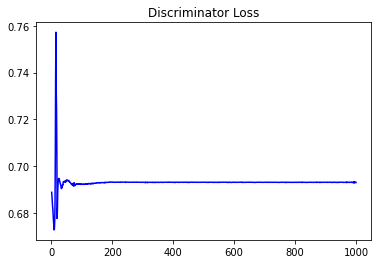

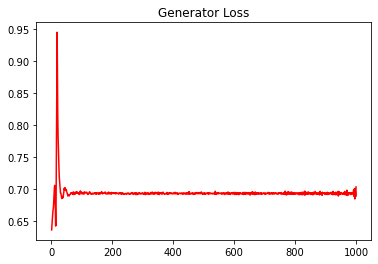

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.18739488533431725


#### Sanity Checks 

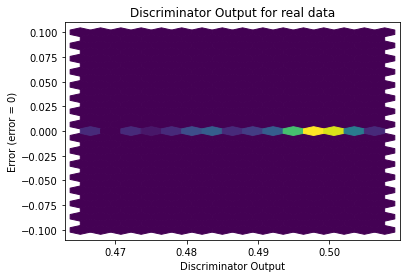

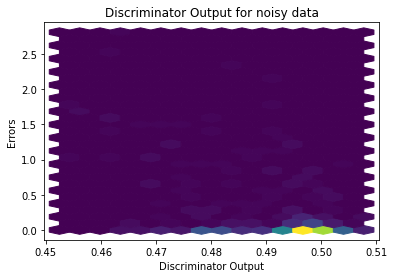

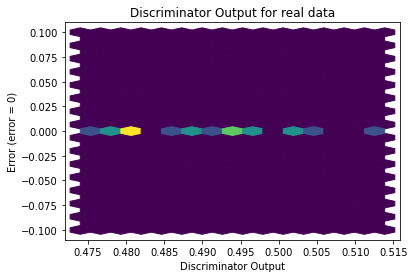

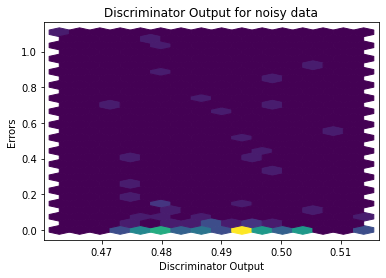

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


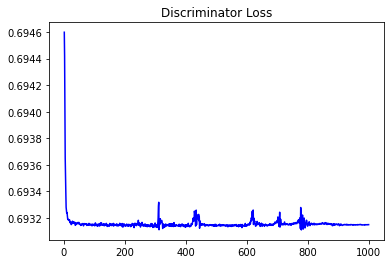

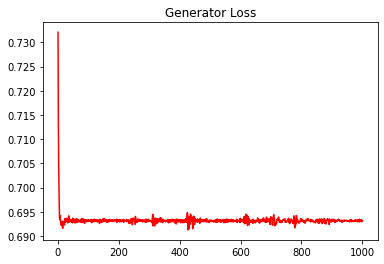

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1459301982347363


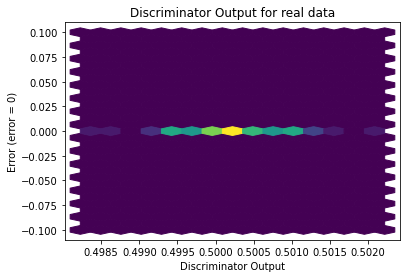

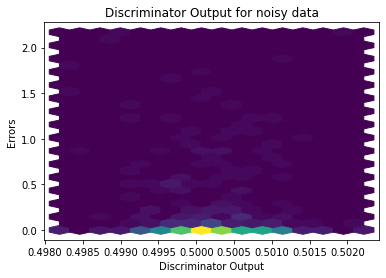

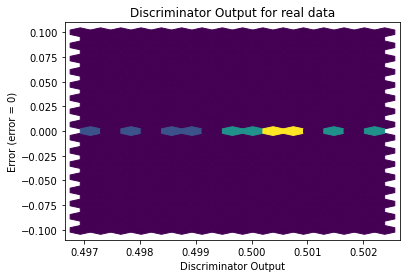

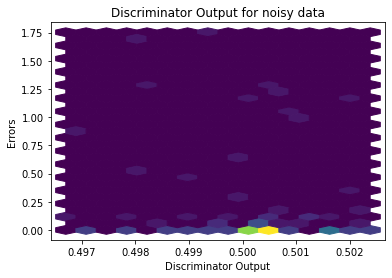

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0178]], device='cuda:0', requires_grad=True)
